In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
def fun(x):
    return (x - 2)**2

In [37]:
x_data = [-1,0,1,2,3,4,5]
y_data = [fun(x) for x in x_data]


### 全部改变为基于随机梯度下降算法(可以统一函数参数)

def activate(x):
    return 1/(1 + np.exp(-x))

def forward(x, y, w1, w2, b1, b2):
    y1 = w1 * x + b1
    z1 = activate(y1)
    y2 = w2 * z1 + b2
    z2 = activate(y2)
    return z1, z2


def loss(x, y, w1, w2, b1, b2):
    z1, z2 = forward(x, y, w1, w2, b1, b2)
    return (y - z2)**2

def gradient(x, y, w1, w2, b1, b2):
    # 更新梯度
    l = loss(x, y, w1, w2, b1, b2)
    z1, z2 = forward(x, y, w1, w2, b1, b2)
    DlossDz2 = 2 * (z2 - y)
    Dz2Dy2 = z2 * (1 - z2)
    Dy2Dw2 = z1
    Dy2Db2 = 1
    dw2 = DlossDz2 * Dz2Dy2 * Dy2Dw2
    db2 = DlossDz2 * Dz2Dy2 * Dy2Db2

    Dy2Dz1 = w2
    Dz1Dy1 = z1 * (1 - z1)
    Dy1Dw1 = x
    Dy1Db1 = 1
    dw1 = DlossDz2 * Dz2Dy2 * Dy2Dz1 * Dz1Dy1 * Dy1Dw1
    db1 = DlossDz2 * Dz2Dy2 * Dy2Dz1 * Dz1Dy1 * Dy1Db1
    return dw1, dw2, db1, db2

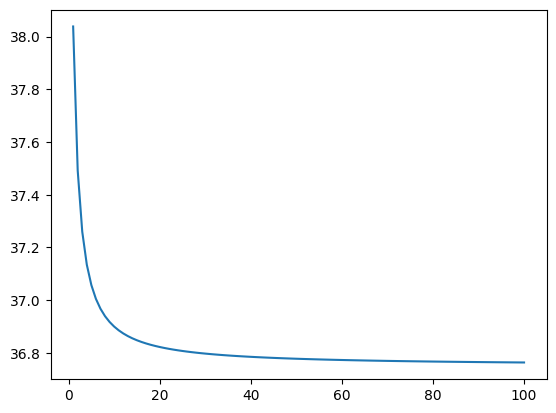

In [38]:
w1 = 1
w2 = 1
b1 = 1
b2 = 1
alpha = 0.1
n = 100
LossList = []
for i in range(n):
    l = 0
    for x, y in zip(x_data, y_data):
        l += loss(x, y, w1, w2, b1, b2)
        dw1, dw2, db1, db2 = gradient(x, y, w1, w2, b1, b2)
        w1 -= alpha * dw1
        w2 -= alpha * dw2
        b1 -= alpha * db1
        b2 -= alpha * db2
    LossList.append(l/4)

epoch = list(range(1, n+1))
plt.plot(epoch,LossList)